Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.478 seconds.
Prefix dict has been built successfully.


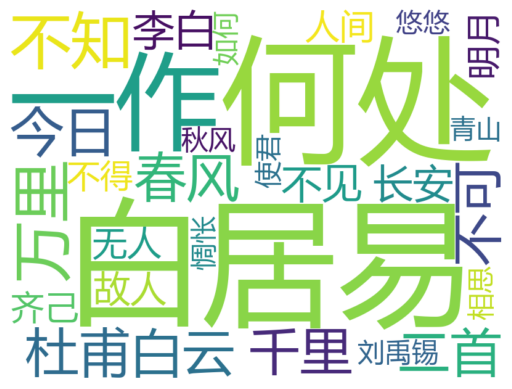

In [2]:
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt
with open('全唐诗.txt', 'r') as f:
    tang_poems = f.read()
# 拼接成整个字符串
corpus = ''.join(tang_poems)
# 标记词语
tokens = jieba.lcut(corpus)
# 计算词语频率
freqs = {}
for token in tokens:
    if len(token) == 1:  # Exclude single-character tokens
        continue
    freqs[token] = freqs.get(token, 0) + 1
# 统计高频词
sorted_freqs = sorted(freqs.items(), key=lambda x: x[1], reverse=True)
# 前50个高频词
top50_chars = [item[0] for item in sorted_freqs[:50]]
# 生成词云
wordcloud = WordCloud(font_path='msyh.ttc', width=800, height=600,
                      background_color='white').generate(' '.join(top50_chars))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

春天出现的次数是： 13132
夏天出现的次数是： 1933
秋天出现的次数是： 9768
冬天出现的次数是： 908


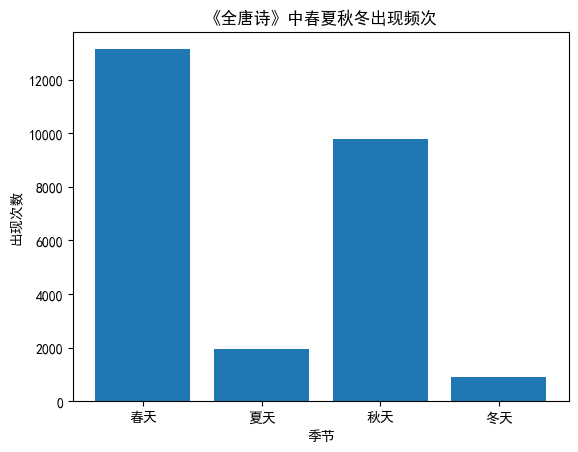

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
with open('全唐诗.txt', 'r') as f:
    contents = f.read()
spring_count = contents.count('春')
summer_count = contents.count('夏') + contents.count('暑')
autumn_count = contents.count('秋')
winter_count = contents.count('冬')
print('春天出现的次数是：', spring_count)
print('夏天出现的次数是：', summer_count)
print('秋天出现的次数是：', autumn_count)
print('冬天出现的次数是：', winter_count)
plt.bar(['春天', '夏天', '秋天', '冬天'], [spring_count,
        summer_count, autumn_count, winter_count])
plt.title('《全唐诗》中春夏秋冬出现频次')
plt.xlabel('季节')
plt.ylabel('出现次数')
plt.show()


In [4]:
import jieba
import os
with open('全唐诗.txt','r',encoding='utf-8') as f:
    text = f.read()
words = jieba.lcut(text)
with open('地名.txt','r',encoding='utf-8') as f:
    place_list = f.read().splitlines()
place_count = {}
for word in words:
    if word in place_list:
        place_count[word] = place_count.get(word,0) + 1
sorted_place_count = sorted(place_count.items(),key=lambda x: x[1], reverse=True)
for place, count in sorted_place_count:
    print(place,count)


长安 926
太原 108
杭州 102
邯郸 99
徐州 47
广州 42
长春 30
大理 23
北京 11
上海 10
南京 7
贵州 2


In [5]:
from gensim.models import Word2Vec
# 示例数据
with open('全唐诗.txt', 'r') as f:
    tang_poems = f.read()
# 将诗句进行分词
tokenized_poems = [poem.split() for poem in tang_poems]
# print(tokenized_poems)
# 训练Word2Vec模型
model = Word2Vec(tokenized_poems, vector_size=10, window=5, min_count=1, workers=4)
# 获取与给定输入字最相似的其他字
input_word = '明'
similar_words = model.wv.most_similar(input_word)
# 显示结果
print(f"与'{input_word}'最相似的字：")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.3f}")


与'明'最相似的字：
蒂: 0.834
冗: 0.821
涛: 0.819
栴: 0.818
壬: 0.804
缅: 0.793
筤: 0.786
忲: 0.775
炅: 0.763
磐: 0.757


In [6]:
import requests
from bs4 import BeautifulSoup
url = 'https://news.sina.cn/project/fy2020/yq_province.shtml?province=hebei'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
print(soup)
# 获取全国疫情数据
# china_data = soup.find('div', {'class': 'areaBlock1'}).find('span').get_text()
# print('全国疫情数据：', china_data)
# # 获取省份疫情数据
# province_list = soup.find('div', {'class': 'areaBox3jZkr'}).findall('div', {'class': 'areaBlock1_3V3UU'})
# for province in province_list:
#     province_name = province.find('span', {'class': 'provinceName3t5qg'}).gettext()
#     province_data = province.find('span', {'class': 'confirmedCount_3d1jk'}).get_text()
#     print(province_name, province_data)


<!DOCTYPE html>

<html>
<head>
<meta charset="utf-8"/>
<meta content="ææºæ°æµªç½,æ°æµªé¦é¡µ,æ°é»èµè®¯,æ°æµªæ°é»,æ°æµªæ çº¿" name="keywords"/>
<meta content="ææºæ°æµªç½æ¯æ°æµªç½çææºé¨æ·ç½ç«ï¼ä¸ºäº¿ä¸ç¨æ·æé ä¸ä¸ªææºèéä¸ççè¶çº§å¹³å°ï¼æä¾24å°æ¶å¨é¢åæ¶çä¸­æèµè®¯ï¼åå®¹è¦çå½åå¤çªåæ°é»äºä»¶ãä½åèµäºãå¨±ä¹æ¶å°ãäº§ä¸èµè®¯ãå®ç¨ä¿¡æ¯ç­ãææºæ°æµªç½è§¦å±ç - sina.cn" name="description"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport"/>
<meta content="no-cache, must-revalidate" http-equiv="Cache-Control"/>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="always" name="referrer"/>
<meta content="index, follow" name="robots"/>
<meta content="index, follow" name="googlebot"/>
<meta content="sina_mobile" name="author"/>
<script type="text/javascr

In [9]:
import pandas as pd
import pyecharts.options as opts
from pyecharts.charts import Map
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB
CurrentConfig.ONLINE_HOST
covid_data = pd.read_csv('DXYArea.csv')
print(covid_data.columns)

Index(['continentName', 'continentEnglishName', 'countryName',
       'countryEnglishName', 'provinceName', 'provinceEnglishName',
       'province_zipCode', 'province_confirmedCount',
       'province_suspectedCount', 'province_curedCount', 'province_deadCount',
       'cityName', 'cityEnglishName', 'city_zipCode', 'city_confirmedCount',
       'city_suspectedCount', 'city_curedCount', 'city_deadCount',
       'updateTime'],
      dtype='object')


     provinceName  province_confirmedCount
0             云南省                     5007
18            陕西省                     5462
32            甘肃省                     1561
49       新疆维吾尔自治区                     2632
69        宁夏回族自治区                      238
75            广东省                    55674
97            湖南省                     2442
113           湖北省                    68862
131           山东省                     4564
165           福建省                     7326
177           江苏省                     3796
192          黑龙江省                     5389
207           辽宁省                     3023
223           吉林省                    40481
236        内蒙古自治区                     8237
250           山西省                     5006
262           北京市                    25249
428           浙江省                     5858
442           河北省                     2839
468           四川省                    11315
611           上海市                    64978
631            香港                   478020
632        

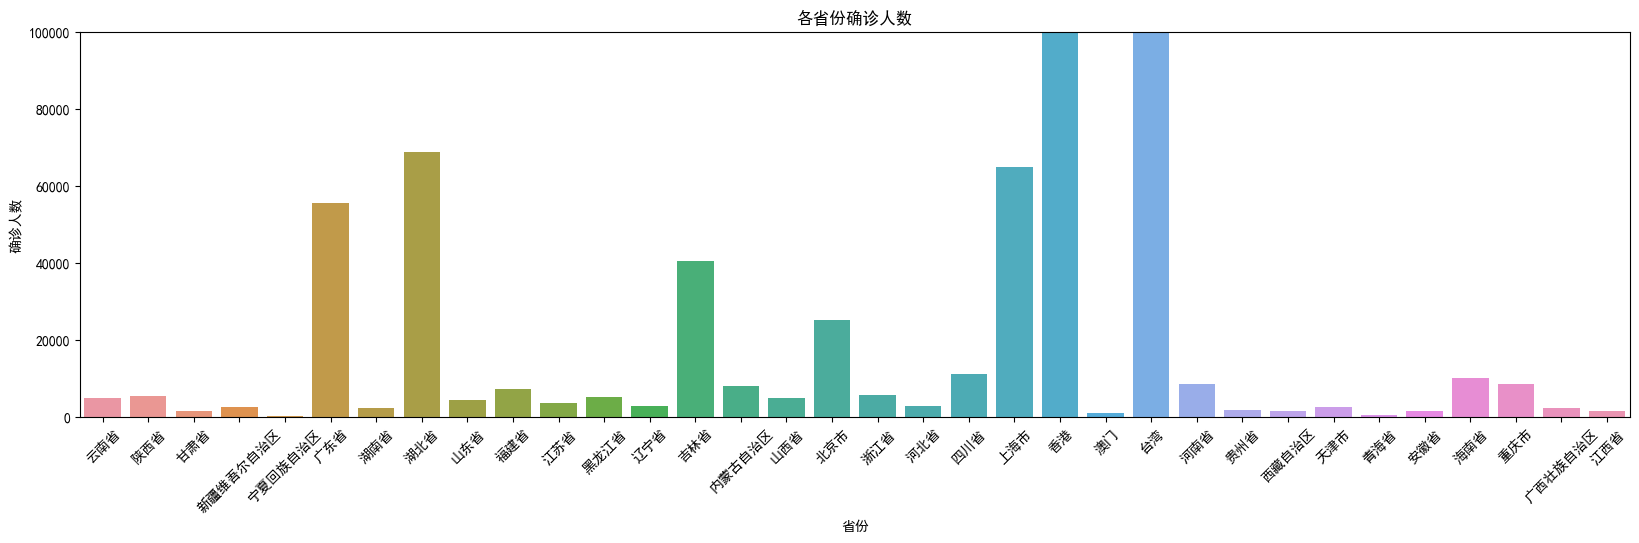

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
new_data = covid_data[covid_data['countryName'] == '中国']
new_data = new_data[['provinceName', 'province_confirmedCount']]
new_data = new_data.drop_duplicates(subset='provinceName')
new_data = new_data.loc[new_data['provinceName'] != '中国']
new_data.to_csv('中国疫情数据.csv')
print(new_data)
plt.figure(figsize=(20, 5))
sns.barplot(x='provinceName', y='province_confirmedCount',
            data=new_data, errorbar=None)
plt.title("各省份确诊人数")
plt.xlabel('省份')
plt.xticks(rotation=45)
plt.ylabel('确诊人数')
plt.ylim(0,100000)
plt.show()

  continentName  confirmedCount
0            亚洲       185903090
1            其他             762
2           北美洲       121106923
3           南美洲        65658608
4           大洋洲        13214465
5            欧洲       242267067
6            非洲        12697203


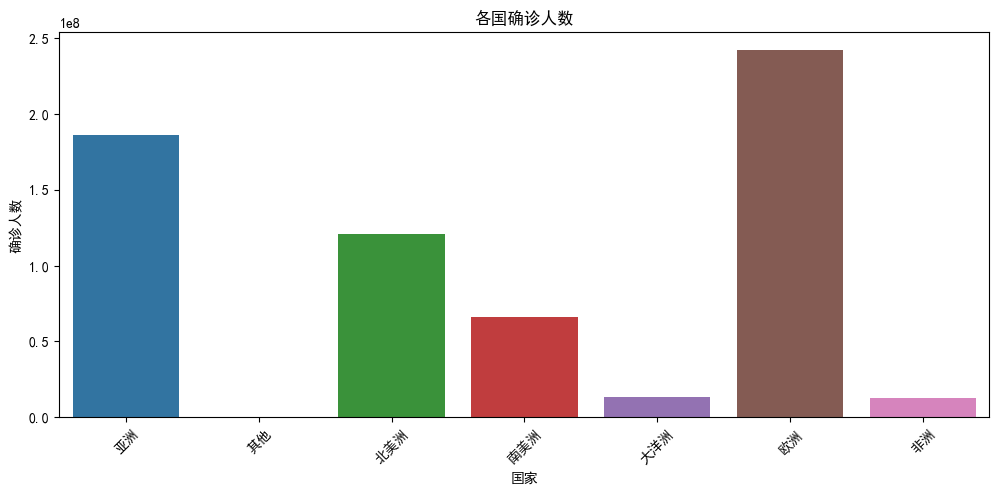

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
new_data = covid_data[covid_data['countryName'] != '中国']
new_data = new_data[['continentName','countryName', 'province_confirmedCount']]
new_data = new_data.drop_duplicates(subset='countryName')
grouped = new_data.groupby('continentName')['province_confirmedCount'].sum()
grouped = grouped.reset_index()
grouped.columns = ['continentName', 'confirmedCount']
new_data.to_csv('世界疫情数据.csv')
print(grouped)
plt.figure(figsize=(12, 5))
sns.barplot(x='continentName', y='confirmedCount',
            data=grouped, errorbar=None)
plt.title("各国确诊人数")
plt.xlabel('国家')
plt.xticks(rotation=45)
plt.ylabel('确诊人数')
# plt.ylim(0,100000)
plt.show()

In [11]:
new_data = covid_data[covid_data['countryName'] == '中国']
new_data = new_data[['provinceName','province_confirmedCount']]
new_data = new_data.drop_duplicates(subset='provinceName')
new_data = new_data.loc[new_data['provinceName'] != '中国']
province=new_data["provinceName"].values.tolist()
print(new_data["provinceName"].values)
nowConfirm=new_data["province_confirmedCount"].values.tolist()
data=[]
i=0
while i< len(province):
    data.append((province[i],nowConfirm[i]))
    i+=1
print(data)
m = Map()
m.add("",data,
      maptype="china",
      is_map_symbol_show=False)
m.set_global_opts(
    title_opts=opts.TitleOpts(title="COVID-19中国现有地区现有确诊人数地图"),
    visualmap_opts=opts.VisualMapOpts(
        is_piecewise=True,
        pieces=[
            {
                "min": 50000,
                "label": '>50000',
                "color": "#893448"
            },  # 不指定 max，表示 max 为无限大
            {
                "min": 20000,
                "max": 49999,
                "label": '20000-49999',
                "color": "#ff585e"
            },
            {
                "min": 10000,
                "max": 19999,
                "label": '10000-19999',
                "color": "#fb8146"
            },
            {
                "min": 5000,
                "max": 9999,
                "label": '5000-9999',
                "color": "#ffA500"
            },
            {
                "min": 1000,
                "max": 4999,
                "label": '1000-4999',
                "color": "#ffb248"
            },
            {
                "min": 500,
                "max": 999,
                "label": '500-999',
                "color": "#fff2d1"
            },
            {
                "max": 499,
                "label": '0-499',
                "color": "#ffffff"
            }
        ]))
m.render("中国疫情地图.html")

['云南省' '陕西省' '甘肃省' '新疆维吾尔自治区' '宁夏回族自治区' '广东省' '湖南省' '湖北省' '山东省' '福建省'
 '江苏省' '黑龙江省' '辽宁省' '吉林省' '内蒙古自治区' '山西省' '北京市' '浙江省' '河北省' '四川省' '上海市'
 '香港' '澳门' '台湾' '河南省' '贵州省' '西藏自治区' '天津市' '青海省' '安徽省' '海南省' '重庆市'
 '广西壮族自治区' '江西省']
[('云南省', 5007), ('陕西省', 5462), ('甘肃省', 1561), ('新疆维吾尔自治区', 2632), ('宁夏回族自治区', 238), ('广东省', 55674), ('湖南省', 2442), ('湖北省', 68862), ('山东省', 4564), ('福建省', 7326), ('江苏省', 3796), ('黑龙江省', 5389), ('辽宁省', 3023), ('吉林省', 40481), ('内蒙古自治区', 8237), ('山西省', 5006), ('北京市', 25249), ('浙江省', 5858), ('河北省', 2839), ('四川省', 11315), ('上海市', 64978), ('香港', 478020), ('澳门', 1142), ('台湾', 8498195), ('河南省', 8692), ('贵州省', 1756), ('西藏自治区', 1522), ('天津市', 2627), ('青海省', 510), ('安徽省', 1699), ('海南省', 10287), ('重庆市', 8542), ('广西壮族自治区', 2431), ('江西省', 1547)]


'/home/dky/Github/Mine/python-practice/day14/中国疫情地图.html'

In [5]:
import pandas as pd
data = pd.read_csv('广告数据集.CSV')
print(data.head)

<bound method NDFrame.head of         TV  radio  newspaper  sales
1    230.1   37.8       69.2   22.1
2     44.5   39.3       45.1   10.4
3     17.2   45.9       69.3    9.3
4    151.5   41.3       58.5   18.5
5    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
196   38.2    3.7       13.8    7.6
197   94.2    4.9        8.1    9.7
198  177.0    9.3        6.4   12.8
199  283.6   42.0       66.2   25.5
200  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>
